# Data cleaning

In [12]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

In [13]:
files_to_import = [degree_top_cat.csv,
                   female_researchers_EU.csv,
                   females_employed_in_ST_EU.csv,
                   graduated_world.csv,
                   males_emplyed_in_ST_EU.csv,
                   mix_data_graduates_school_age.csv,
                   nobel.csv,notes_tall_sele.csv,
                   people_age_tertiary_education.csv,
                   sex_ratio_at_birth_males_chao_et_al.csv,
                   sex_ratio_at_birth.csv,
                   sex_ratio_at_five_years_old.csv,
                   sex_ratio_by_age.csv,
                   share_population_female.csv,
                   tertiary_education_women.csv,
                   women_men_scientist_EU.csv,
                   women_men_scientists_EU_2.csv
                  ]

NameError: name 'degree_top_cat' is not defined

In [14]:
'''degree_top_cat.csv,
female_researchers_EU.csv,
females_employed_in_ST_EU.csv,
graduated_world.csv,
males_emplyed_in_ST_EU.csv,
mix_data_graduates_school_age.csv,
nobel.csv,notes_tall_sele.csv,
people_age_tertiary_education.csv,
sex_ratio_at_birth_males_chao_et_al.csv,
sex_ratio_at_birth.csv,
sex_ratio_at_five_years_old.csv,
sex_ratio_by_age.csv,
share_population_female.csv,
tertiary_education_women.csv,
women_men_scientist_EU.csv,
women_men_scientists_EU_2.csv'''

'degree_top_cat.csv,\nfemale_researchers_EU.csv,\nfemales_employed_in_ST_EU.csv,\ngraduated_world.csv,\nmales_emplyed_in_ST_EU.csv,\nmix_data_graduates_school_age.csv,\nnobel.csv,notes_tall_sele.csv,\npeople_age_tertiary_education.csv,\nsex_ratio_at_birth_males_chao_et_al.csv,\nsex_ratio_at_birth.csv,\nsex_ratio_at_five_years_old.csv,\nsex_ratio_by_age.csv,\nshare_population_female.csv,\ntertiary_education_women.csv,\nwomen_men_scientist_EU.csv,\nwomen_men_scientists_EU_2.csv'

## Sex ratio at birth (males/100 females)

In [15]:
sexr_birth = pd.read_csv("data/sex_ratio_at_birth.csv")


In [16]:
sexr_birth.columns = ['Entity', 'Code', 'Year',
       'male/100female']

In [17]:
sexr_birth[sexr_birth["Year"]==2017]

,Entity,Code,Year,male/100female
20,Afghanistan,AFG,2017,106.0
41,Albania,ALB,2017,107.8
62,Algeria,DZA,2017,105.0
83,Angola,AGO,2017,103.0
104,Antigua and Barbuda,ATG,2017,103.0
...,...,...,...,...
4877,Venezuela,VEN,2017,105.0
4898,Vietnam,VNM,2017,109.7
4939,Yemen,YEM,2017,105.0
4960,Zambia,ZMB,2017,103.0


## Sex ratio throught the years (males/100 females)

In [18]:
sexr_years = pd.read_csv("data/sex_ratio_by_age.csv")

In [19]:
sexr_years.head()

,Entity,Code,Year,100-year olds (males per 100 females),15-year olds (males per 100 females),20-year olds (males per 100 females),30-year olds (males per 100 females),40-year olds (males per 100 females),50-year olds (males per 100 females),60-year olds (males per 100 females),70-year olds (males per 100 females),80-year olds (males per 100 females),90-year olds (males per 100 females)
0,Afghanistan,AFG,1990,42.857143,107.567880,107.606890,106.470367,97.200196,101.432710,96.413713,90.443686,89.011455,86.713287
1,Afghanistan,AFG,1991,42.857143,108.069693,108.102380,107.016689,101.244920,104.548683,95.638925,91.652546,88.065374,110.526316
2,Afghanistan,AFG,1992,50.000000,108.764971,108.753854,107.698225,105.467180,107.982231,95.461732,92.693197,87.860292,111.612903
3,Afghanistan,AFG,1993,50.000000,109.405085,109.380552,108.395056,108.376955,108.518621,96.194394,94.127130,87.511285,106.214689
4,Afghanistan,AFG,1994,50.000000,109.779351,109.850800,108.881665,109.077761,105.456109,97.710829,96.144108,86.912120,98.876404


In [20]:
# renaming the columns

sexr_years.columns = ['Country', 'Code', 'Year', '100_yrs',
       '15_yrs',
       '20_yrs',
       '30_yrs',
       '40_yrs',
       '50_yrs',
       '60_yrs',
       '70_yrs',
       '80_yrs',
       '90_yrs']

In [21]:
# eliminating some columns

sexr_years = sexr_years[['Country', 'Code', 'Year',
       '15_yrs',
       '20_yrs',
       '30_yrs',
       '40_yrs',
       '50_yrs',
       '60_yrs',
       '70_yrs',
       '80_yrs',
       '90_yrs',
       '100_yrs']]

In [22]:
#should I take the average ratio (over the years)? --> Ali say yes

avg_sex_years = sexr_years.groupby("Country")[['15_yrs',
       '20_yrs',
       '30_yrs',
       '40_yrs',
       '50_yrs',
       '60_yrs',
       '70_yrs',
       '80_yrs',
       '90_yrs',
       '100_yrs']].mean()

In [23]:
avg_sex_years = avg_sex_years.reset_index()

In [24]:
#should I just take the data from the last available year (2015)?

sexr_years[sexr_years["Year"]==2015]

,Country,Code,Year,15_yrs,20_yrs,30_yrs,40_yrs,50_yrs,60_yrs,70_yrs,80_yrs,90_yrs,100_yrs
25,Afghanistan,AFG,2015,105.998033,107.004742,109.356582,112.198038,108.885775,102.158580,88.325325,80.711219,67.745803,40.000000
91,Africa,NaN,2015,101.975553,101.294583,99.200745,98.422808,95.244795,91.296937,84.479727,74.294529,58.273247,34.992224
157,Albania,ALB,2015,103.116917,114.688507,108.207052,90.521110,95.450063,99.191620,99.775931,90.927054,44.812165,26.530612
223,Algeria,DZA,2015,104.429598,103.603873,101.323156,100.024892,99.750962,105.740137,95.057167,89.289875,89.818306,100.996678
289,Angola,AGO,2015,96.894144,95.968628,94.861455,94.191496,91.776734,87.007881,81.502183,70.626733,46.837945,21.428571
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15601,Western Sahara,ESH,2015,101.800400,102.184054,116.624365,115.955176,126.230228,128.969791,110.152284,105.555556,80.952381,NaN
15667,World,OWID_WRL,2015,106.929543,106.377936,103.539199,102.601921,100.500310,96.396944,89.056243,73.763476,49.640029,25.758375
15733,Yemen,YEM,2015,103.946005,103.603795,101.774333,106.804109,87.666277,96.426777,89.906866,75.825003,72.727273,50.000000
15799,Zambia,ZMB,2015,100.668068,100.064335,99.113205,97.650863,90.362645,76.683425,76.198180,71.351263,56.981132,33.333333


### University ratio (15-20-30 yrs)

In [25]:
#AVERAGE OF ALL THE YEARS PER COUNTRY!!!!!!!

# university wise the ratio we would be interesed in is the 15-20-30 yrs

ratio_uni = avg_sex_years[['Country','15_yrs','20_yrs','30_yrs']]

In [26]:
ratio_uni = ratio_uni.reset_index(drop=True)

In [27]:
ratio_uni.head()

,Country,15_yrs,20_yrs,30_yrs
0,Afghanistan,105.756304,106.726386,108.645750
1,Africa,101.303343,100.543197,98.875808
2,Albania,106.435468,106.585146,102.829338
3,Algeria,104.044997,103.748809,101.463374
4,Angola,97.528396,97.077621,94.683326


In [28]:
# let's calculate the average ratio 15-20-30

ratio_uni['ratio_15_20_30'] = (ratio_uni['15_yrs']+ratio_uni['20_yrs']+ratio_uni['30_yrs'])/3

In [29]:
countries = ratio_uni['Country'].tolist()
print(countries)

['Afghanistan', 'Africa', 'Albania', 'Algeria', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba', 'Asia', 'Australia', 'Australia/New Zealand', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde', 'Caribbean', 'Central African Republic', 'Central America', 'Central Asia', 'Chad', 'Channel Islands', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao', 'Cyprus', 'Czech Republic', 'Democratic Republic of Congo', 'Denmark', 'Djibouti', 'Dominican Republic', 'Eastern Africa', 'Eastern Asia', 'Eastern Europe', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Ethiopia', 'Europe', 'Fiji', 'Finland', 'France', 'French Guiana', 'French Polynesia', 'Gabon', 'Gambia', 'Geo

In [30]:
ratio_uni[['Country','ratio_15_20_30']]

,Country,ratio_15_20_30
0,Afghanistan,107.042813
1,Africa,100.240783
2,Albania,105.283317
3,Algeria,103.085727
4,Angola,96.429781
...,...,...
236,Western Sahara,112.508243
237,World,104.039125
238,Yemen,101.116367
239,Zambia,99.660996


### Working ratio (20 to 70 yrs)

In [31]:
ratio_20_70 = avg_sex_years[['Country','20_yrs','30_yrs','40_yrs','50_yrs','60_yrs','70_yrs']]

In [32]:
ratio_20_70 = ratio_20_70.reset_index(drop=True)

In [33]:
ratio_20_70.head()

,Country,20_yrs,30_yrs,40_yrs,50_yrs,60_yrs,70_yrs
0,Afghanistan,106.726386,108.645750,109.383778,107.003561,104.382058,102.168616
1,Africa,100.543197,98.875808,98.023633,95.262832,90.277777,83.367406
2,Albania,106.585146,102.829338,104.371601,106.670667,102.163561,91.914158
3,Algeria,103.748809,101.463374,99.078244,96.862044,96.595066,93.588465
4,Angola,97.077621,94.683326,93.145577,90.201131,84.726234,77.904478


In [34]:
# ratio

ratio_20_70['ratio_20_70'] = (ratio_20_70['20_yrs']+
                              ratio_20_70['30_yrs']+
                              ratio_20_70['40_yrs']+
                              ratio_20_70['50_yrs']+
                             ratio_20_70['60_yrs']+
                             ratio_20_70['70_yrs'])/6

In [35]:
ratio_20_70['ratio_20_60_2'] = (ratio_20_70['20_yrs']+
                              ratio_20_70['30_yrs']+
                              ratio_20_70['40_yrs']+
                              ratio_20_70['50_yrs']+
                             ratio_20_70['60_yrs'])/5

In [36]:
ratio_20_70[['Country','ratio_20_70','ratio_20_60_2']]

,Country,ratio_20_70,ratio_20_60_2
0,Afghanistan,106.385025,107.228306
1,Africa,94.391775,96.596649
2,Albania,102.422412,104.524063
3,Algeria,98.556000,99.549507
4,Angola,89.623061,91.966778
...,...,...,...
236,Western Sahara,124.288938,126.230644
237,World,96.994815,100.116662
238,Yemen,93.554409,95.354776
239,Zambia,92.673105,94.449804


###  Average world data

In [37]:
# world average ratios

world_avg_ratio = avg_sex_years[avg_sex_years['Country']=='World']
world_avg_ratio = world_avg_ratio[['15_yrs', '20_yrs', '30_yrs', '40_yrs', '50_yrs', '60_yrs',
       '70_yrs', '80_yrs', '90_yrs', '100_yrs']]

In [38]:
#let's rename the index

world_avg_ratio.index = ['male/100females']

In [39]:
world_avg_ratio[:1]

,15_yrs,20_yrs,30_yrs,40_yrs,50_yrs,60_yrs,70_yrs,80_yrs,90_yrs,100_yrs
male/100females,104.823958,104.248846,103.044571,101.727257,98.907248,92.655386,81.385579,67.664073,44.240024,23.652859


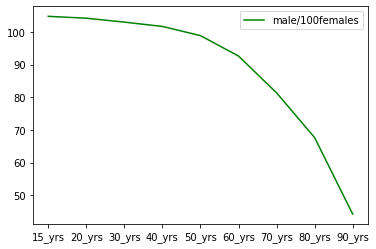

In [49]:
world_avg_ratio.T[:-1].plot(color='g')
plt.show()

In [46]:
world_ratio_to90 =world_avg_ratio.T[:-1]

In [47]:
world_ratio_to90.to_csv('data/world_ratio_to90.csv')

In [572]:
# HOW DO I PLOT THIS INFO TO SHOW THE DECREASING TREND? 
# initially there are more males and then more females

In [483]:
# World data for the uni range ratio

ratio_uni[ratio_uni['Country']=='World']

,Country,15_yrs,20_yrs,30_yrs,ratio_15_20_30
237,World,104.248846,103.044571,101.727257,103.006891


In [576]:
# World data for working range ratio

ratio_20_70[ratio_20_70['Country']=='World']

,Country,20_yrs,30_yrs,40_yrs,50_yrs,60_yrs,70_yrs,ratio_20_70,ratio_20_60_2
237,World,103.044571,101.727257,98.907248,92.655386,81.385579,67.664073,90.897352,95.544008


### CONCLUSIONS

The ratio at younger ages is male favoured with around **104 males** / **100 females** but as we get older, that ratio shifts (age 30 is the breaking point) into female favoured to a point where at 90, there are only **23 males** / **100 females** (with the exception of 100 year olds that are male dominated (104/100)
<br><br>
The age ratio during the university year is around : **103 males / 100 females**
<br><br>
The age ratio during the employability years is around:
- **90 males / 100 females** (from ratio 20 yrs to 70 yrs)
- **95 males / 100 females** (from ratio 20 yrs to 60 yrs)
<br><br>
```So...theoretically, it seems that the ratio is male favoured but not by a lot and we should see a lot more female presence in the nobel prices```


***

## Female Population %

In [85]:
female_wpop = pd.read_csv("data/share_population_female.csv")

In [92]:
female_wpop.columns = ['Country', 'Code', 'Year',
       '%female/%total']

In [583]:
# last year available is 2017
# percentage of females per country

female_2017 = female_wpop[female_wpop['Year']==2017][["Country","%female/%total" ]]

In [585]:
female_2017[female_2017['Country']=='World']

,Country,%female/%total
13679,World,49.55572


### CONCLUSIONS

We stablished the ratios of male/female over the years in the above section and saw that although initially the ratio is male favoured, that around age 30 it shiftes to being female favoured up to extreme values (23 males/ 100 females).
<br>
But which is the percentage of total females in the world (latest data available is from 2017)?
<br><br>
It is ```49'56 %``` females
<br><br>
```So, shouldn't we see a lot more females in the nobel prices?```


## Tertiary education

In [131]:
tertiary = pd.read_csv('data/mix_data_graduates_school_age.csv')

# contains the info for UNIAGE, Graduates and Graduates STEM

In [132]:
tertiary.head()

,EDULIT_IND,Indicator,LOCATION,Country,TIME,Time,Value,Flag Codes,Flags
0,FGP_5T8,Percentage of graduates from tertiary educatio...,PSE,Palestine,2013,2013,59.48865,NaN,NaN
1,FGP_5T8,Percentage of graduates from tertiary educatio...,PSE,Palestine,2014,2014,60.41249,NaN,NaN
2,FGP_5T8,Percentage of graduates from tertiary educatio...,PSE,Palestine,2015,2015,60.28197,NaN,NaN
3,FGP_5T8,Percentage of graduates from tertiary educatio...,PSE,Palestine,2016,2016,61.09075,NaN,NaN
4,FGP_5T8,Percentage of graduates from tertiary educatio...,PSE,Palestine,2017,2017,60.81508,NaN,NaN


In [133]:
# renaming columns

tertiary.columns = ['EDULIT_IND', 'Indicator', 'Code', 'Country', 'TIME', 'Year',
       'Value', 'Flag Codes', 'Flags']

In [134]:
# eliminating columns

tertiary = tertiary[['Indicator', 'Code', 'Country', 'Year',
       'Value']]

In [592]:
# for which countries do we have information?

countries_t = tertiary['Country'].value_counts()
countries_t.index.tolist()

# many many countries

# Middle income countries'
# World
# 'United Kingdom of Great Britain and Northern Ireland'
# 'Germany'
#'Least Developed Countries'
# Northern America and Europe
# 'Oceania',
# 'Europe'
# 'Upper middle income countries',
# 'Lower middle income countries'
# 'Low income countries'
# 'High income countries'


['India',
 'Georgia',
 'Kazakhstan',
 'Colombia',
 'Madagascar',
 'Burkina Faso',
 'Honduras',
 'Latin America and the Caribbean',
 'El Salvador',
 'Small Island Developing States',
 'Azerbaijan',
 'Oman',
 'Serbia',
 'China, Macao Special Administrative Region',
 'World',
 'Armenia',
 'Saudi Arabia',
 'Albania',
 'Palestine',
 'Seychelles',
 'Costa Rica',
 'Ghana',
 'Mozambique',
 "Lao People's Democratic Republic",
 'Belgium',
 'Kyrgyzstan',
 'Bulgaria',
 'Portugal',
 'Chile',
 'Bahrain',
 'Indonesia',
 'Finland',
 'Lithuania',
 'Czechia',
 'Hungary',
 'New Zealand',
 'Cyprus',
 'Estonia',
 'Poland',
 'Malta',
 'Switzerland',
 'Spain',
 'Latvia',
 'Denmark',
 'Norway',
 'Mexico',
 'Mongolia',
 'Qatar',
 'Republic of Moldova',
 'Algeria',
 'Belarus',
 'Tunisia',
 'Namibia',
 'Niger',
 'Romania',
 'North Macedonia',
 'United States of America',
 'Morocco',
 'Canada',
 'Australia',
 'Luxembourg',
 'Grenada',
 'Slovenia',
 'Ireland',
 'United Kingdom of Great Britain and Northern Ireland

In [113]:
tertiary['Indicator'].value_counts()

School age population, tertiary education, female (number)                                                                           1079
School age population, tertiary education, both sexes (number)                                                                       1079
School age population, tertiary education, male (number)                                                                             1079
Percentage of graduates from tertiary education who are female (%)                                                                    565
Percentage of graduates from Science, Technology, Engineering and Mathematics programmes in tertiary education, both sexes (%)        412
Percentage of male graduates from Science, Technology, Engineering and Mathematics programmes in tertiary education, male (%)         402
Percentage of female graduates from Science, Technology, Engineering and Mathematics programmes in tertiary education, female (%)     402
Name: Indicator, dtype: int64

### UNIAGE (age to study)

In [632]:
# people that are in the age of going to uni

uniage = tertiary[tertiary['Indicator']=='School age population, tertiary education, both sexes (number)']
uniage = uniage[['Country', 'Year', 'Value']]
uniage.columns = ['Country', 'Year', 'tot_uniage']

In [633]:
# females that are in the age of going to uni (number)

fem_uniage = tertiary[tertiary['Indicator']=='School age population, tertiary education, female (number)']
fem_uniage = fem_uniage[['Country', 'Year', 'Value']]
fem_uniage.columns = ['Country', 'Year', 'fem_uniage']

In [635]:
# let's melt total uniage with fem uniage 

uniage_merge = pd.merge(uniage, fem_uniage)

In [637]:
# let's create a new column with the % female in uniage

uniage_merge['%_females_uniage'] = (uniage_merge['fem_uniage']/uniage_merge['tot_uniage'])*100

In [640]:
# did it work?
uniage_merge.head(2)

,Country,Year,tot_uniage,fem_uniage,%_females_uniage
0,Syrian Arab Republic,2013,2008848.0,978826.0,48.725737
1,Syrian Arab Republic,2014,1904201.0,925714.0,48.614301


#### Data by country from the melted df


In [639]:
# let's see the values for north america and europe

uniage_merge[uniage_merge['Country']=='Northern America and Europe']

,Country,Year,tot_uniage,fem_uniage,%_females_uniage
1064,Northern America and Europe,2013,70196954.0,34241761.75,48.779555
1065,Northern America and Europe,2014,68561479.0,33417668.00,48.741171
1066,Northern America and Europe,2015,67042916.0,32666260.50,48.724403
1067,Northern America and Europe,2016,65536641.5,31928257.00,48.718177
1068,Northern America and Europe,2017,64461249.5,31415516.00,48.735506
1069,Northern America and Europe,2018,64311623.0,31342636.00,48.735570


In [706]:
# let's see for the developed countries (high income countries)

uniage_merge[uniage_merge['Country']=='High income countries']

# value is slightly lower than North America and Europe but quite similar

,Country,Year,tot_uniage,fem_uniage,%_females_uniage
958,High income countries,2013,73693798.75,35713395.0,48.461873
959,High income countries,2014,72990498.00,35364073.0,48.450242
960,High income countries,2015,72103054.50,34953083.0,48.476563
961,High income countries,2016,71086985.50,34492971.0,48.522202
962,High income countries,2017,70581635.50,34219466.0,48.482110
963,High income countries,2018,70531830.00,34189359.0,48.473659


In [707]:
# is there a difference between high income and low income countries?

uniage_merge[uniage_merge['Country']=='Low income countries']

# there actually is! the % is higher! closer to a 50/50 female/male ratio

,Country,Year,tot_uniage,fem_uniage,%_females_uniage
408,Low income countries,2013,5.814541e+07,2.903911e+07,49.942211
409,Low income countries,2014,5.987227e+07,2.989250e+07,49.927122
410,Low income countries,2015,6.084491e+07,3.037412e+07,49.920557
411,Low income countries,2016,6.174392e+07,3.080842e+07,49.897097
412,Low income countries,2017,6.249307e+07,3.116879e+07,49.875597
413,Low income countries,2018,6.309003e+07,3.145317e+07,49.854418


In [649]:
# and worldwide?

world_uniage = uniage_merge[uniage_merge['Country']=='World'].groupby('Year').mean()
world_uniage

,tot_uniage,fem_uniage,%_females_uniage
Year,,,
2013,5.998582e+08,2.913045e+08,48.562233
2014,5.954734e+08,2.888606e+08,48.509412
2015,5.913615e+08,2.866448e+08,48.472006
2016,5.888196e+08,2.851399e+08,48.425676
2017,5.880807e+08,2.846371e+08,48.401025
2018,5.879637e+08,2.844814e+08,48.384180


#### CONCLUSIONS
It seems that overall the % of females that are in the age of tertiary education is around ```48 %```.
<br><br>
- ```high income countries``` (uniage female %) -----> ```48%``` 
- ```low income contries``` (uniage female %) --------> ```50%```.

### Uni new entrants by field

In [1092]:
entrants = pd.read_csv('data/new_entrants_per_field.csv')

In [1093]:
entrants = entrants[['Country ', 'Sex', 'Field',
       'Year ','Value']]

In [1094]:
entrants.head(1)

,Country,Sex,Field,Year,Value
0,Australia,Total,Generic programmes and qualifications,2013,NaN


In [1095]:
entrants['Field'].value_counts()

Information and Communication Technologies          3840
Arts and humanities                                 3840
Engineering, manufacturing and construction         3840
Services                                            3840
Generic programmes and qualifications               3840
Science, technology, engineering and mathematics    3840
Health and welfare                                  3840
Social sciences, journalism and information         3840
Business, administration and law                    3840
Natural sciences, mathematics and statistics        3840
Agriculture, forestry, fisheries and veterinary     3840
Education                                           3834
Name: Field, dtype: int64

In [1122]:
# Separated by sex
fem_entrants = entrants[entrants['Sex']=='Women']
male_entrants = entrants[entrants['Sex']=='Men']

In [1126]:
fem_entrants.dropna(inplace = True)

<ipython-input-1126-11ea47bcf5a4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fem_entrants.dropna(inplace = True)


In [1131]:
fem_entrants.columns

Index(['Country ', 'Sex', 'Field', 'Year ', 'Value'], dtype='object')

In [1139]:
fem_percentage_field = fem_entrants.groupby('Field')['Value'].mean().reset_index()
fem_percentage_field

,Field,Value
0,"Agriculture, forestry, fisheries and veterinary",2.591748
1,Arts and humanities,11.921825
2,"Business, administration and law",21.086210
3,Education,11.703032
4,"Engineering, manufacturing and construction",7.959494
5,Generic programmes and qualifications,0.092615
6,Health and welfare,21.735713
7,Information and Communication Technologies,1.673179
8,"Natural sciences, mathematics and statistics",7.129997
9,"Science, technology, engineering and mathematics",16.745581


In [1147]:
STEM = round(fem_percentage_field['Value'].iloc[0]
        +fem_percentage_field['Value'].iloc[4]
        +fem_percentage_field['Value'].iloc[7]
        +fem_percentage_field['Value'].iloc[8]
       ,2)
STEM

19.35

#### CONCLUSIONS

From the University new entrants, only **19.35%** choose a STEM field:

- Agriculture, forestry, fisheries and veterinary --> 2.591748
- Information and Communication Technologies -------> 1.673179
- Engineering, manufacturing and construction ------> 7.959494
- Natural sciences, mathematics and statistics -----> 7.129997

But it seems that scientific field of Health and welfare is quite popular with a: **21.74%**
<br>
Also the field of Bussiness, administration and law with a: **21.09%**

### PISA 2018

In [1150]:
pisa = pd.read_csv ('data/PISA_maths_science_2018.csv',sep=';')

In [1169]:
pisa.head(2)

,Country,Fem_maths_P18,Male_maths_P18,fem_science_P18,male_science_P18
0,OECD_avg,487,492,490,488
1,Australia,488,494,502,504


In [1172]:
pisa['fem_maths_science_P18'] = (pisa['Fem_maths_P18']+pisa['fem_science_P18'])/2

In [1173]:
pisa['male_maths_science_P18'] = (pisa['Male_maths_P18']+pisa['male_science_P18'])/2

In [1176]:
pisa_mean = pisa[['Country','fem_maths_science_P18','male_maths_science_P18']]

In [1183]:
pisa_mean['Country'].values

array(['OECD_avg', 'Australia', 'Austria', 'Belgium', 'Canada', 'Chile',
       'Colombia', 'Czech Republic', 'Denmark', 'Estonia', 'Finland',
       'France', 'Germany', 'Greece', 'Hungary', 'Iceland', 'Ireland',
       'Israel', 'Italy', 'Japan', 'Korea', 'Latvia', 'Lithuania',
       'Luxembourg', 'Mexico', 'Netherlands', 'New Zealand', 'Norway',
       'Poland', 'Portugal', 'Slovak Republic', 'Slovenia', 'Spain',
       'Sweden', 'Switzerland', 'Turkey', 'United Kingdom',
       'United States'], dtype=object)

In [1186]:
pisa_mean['Continent'] = ['OECD_avg', 'Oceania', 'Europe', 'Europe', 'North America', 'South America',
       'South America', 'Europe', 'Europe', 'Europe', 'Europe',
       'Europe', 'Europe', 'Europe', 'Europe', 'Europe', 'Europe',
       'Asia', 'Europe', 'Asia', 'Asia', 'Europe', 'Europe',
       'Europe', 'North America', 'Europe', 'Oceania', 'Europe',
       'Europe', 'Europe', 'Europe', 'Europe', 'Europe',
       'Europe', 'Europe', 'Asia', 'Europe',
       'North America']

<ipython-input-1186-e2f3ebcd7c75>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pisa_mean['Continent'] = ['OECD_avg', 'Oceania', 'Europe', 'Europe', 'North America', 'South America',


In [1187]:
pisa_mean

,Country,fem_maths_science_P18,male_maths_science_P18,Continent
0,OECD_avg,488.5,490.0,OECD_avg
1,Australia,495.0,499.0,Oceania
2,Austria,490.5,498.0,Europe
3,Belgium,499.0,507.5,Europe
4,Canada,515.0,515.0,North America
5,Chile,428.0,433.0,South America
6,Colombia,394.0,410.5,South America
7,Czech Republic,498.0,498.5,Europe
8,Denmark,500.5,501.5,Europe
9,Estonia,526.0,528.0,Europe


In [1188]:
# export to work on tableau

pisa_mean.to_csv('data/PISA18.csv', index = False)

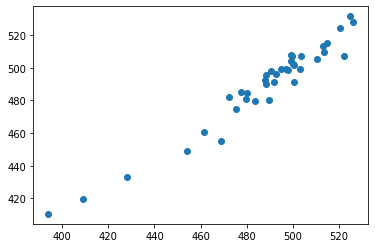

In [1190]:
plt.scatter(pisa_mean['fem_maths_science_P18'],pisa_mean['male_maths_science_P18'])

### Graduates

In [596]:
# female graduates (%)

fem_grads = tertiary[tertiary['Indicator']=='Percentage of graduates from tertiary education who are female (%)']
fem_grads = fem_grads[['Country', 'Year', 'Value']]
fem_grads.columns = ['Country', 'Year', 'fem_grads']

In [708]:
# All the countries that we have info of

countries_fem_grads = fem_grads['Country'].value_counts()
countries_fem_grads = countries_fem_grads.index.tolist()
countries_fem_grads

['Kazakhstan',
 'Georgia',
 'Oman',
 'Mozambique',
 'Serbia',
 'India',
 'Brunei Darussalam',
 'Republic of Moldova',
 'Sri Lanka',
 'Mongolia',
 'Costa Rica',
 'Uzbekistan',
 'China',
 'Qatar',
 'Honduras',
 'Palestine',
 'Seychelles',
 'Burkina Faso',
 'El Salvador',
 'Saudi Arabia',
 'Azerbaijan',
 'Ukraine',
 'Armenia',
 'China, Macao Special Administrative Region',
 'Ghana',
 'Bosnia and Herzegovina',
 'Albania',
 'Colombia',
 "Lao People's Democratic Republic",
 'Madagascar',
 'Andorra',
 'Tunisia',
 'Japan',
 'Poland',
 'Kyrgyzstan',
 'United Arab Emirates',
 'New Zealand',
 'Denmark',
 'Bahrain',
 'Malta',
 'South Africa',
 'Mexico',
 'Rwanda',
 'Estonia',
 'Bulgaria',
 'Hungary',
 'Chile',
 'Cyprus',
 'Latvia',
 'Czechia',
 'Lithuania',
 'Indonesia',
 'Belarus',
 'Algeria',
 'Portugal',
 'Spain',
 'Finland',
 'Belgium',
 'Switzerland',
 'Namibia',
 'Republic of Korea',
 'Norway',
 'Tajikistan',
 'Canada',
 'Slovenia',
 'Romania',
 'Monaco',
 'Ecuador',
 'United Kingdom of Grea

In [655]:
# there is no world value available in Country neither is there a high income countries value
# or any other that groups various countries

fem_grads[fem_grads['Country']=='World']

,Country,Year,fem_grads


In [859]:
# Because we do not have a world value or any value grouping countries 
# we are gonna use the countries listed as developed (advanced_countries)

'''let's see which countries that are developed we have'''
# countries_fem_grads --> countries in the dataset
# advanced_countries ---> countries that are advanced economies

adv_countries_femgrad = []
NOTadv_countries_femgrad = []
for item in countries_fem_grads:
    if item in high_countries:
        adv_countries_femgrad.append(item)
    else:
        NOTadv_countries_femgrad.append(item)

In [860]:
# did it work? do we have any country in that list?

adv_countries_femgrad[:5] #-----> countries to use for the high income countries grads

# YAAAAY we do!!

['Oman', 'Qatar', 'Seychelles', 'Saudi Arabia', 'Andorra']

In [861]:
#and for the NOTadv?
NOTadv_countries_femgrad[:5]

['Kazakhstan', 'Georgia', 'Mozambique', 'Serbia', 'India']

In [863]:
print(adv_countries_femgrad)

['Oman', 'Qatar', 'Seychelles', 'Saudi Arabia', 'Andorra', 'Japan', 'Poland', 'United Arab Emirates', 'New Zealand', 'Denmark', 'Bahrain', 'Malta', 'Estonia', 'Hungary', 'Chile', 'Cyprus', 'Latvia', 'Lithuania', 'Portugal', 'Spain', 'Finland', 'Belgium', 'Switzerland', 'Norway', 'Canada', 'Slovenia', 'Romania', 'Monaco', 'United Kingdom of Great Britain and Northern Ireland', 'Australia', 'Puerto Rico', 'Slovakia', 'Bermuda', 'Ireland', 'Sweden', 'France', 'Croatia', 'Austria', 'Greece', 'United States of America', 'Italy', 'Luxembourg', 'Panama', 'Aruba', 'Germany', 'Netherlands', 'British Virgin Islands', 'Singapore', 'Liechtenstein', 'Curaçao', 'Palau', 'Mauritius', 'San Marino', 'Uruguay']


#### World value

In [979]:
fem_grads['fem_grads'].mean()

56.13876319148937

#### Wvalue: CONCLUSIONS
There seem to be more females than males graduating from university: ```~56%```

#### High Income

In [864]:
#dataset of the high income countries for the female graduates

femgrad_adv_info = fem_grads[fem_grads['Country'].isin(adv_countries_femgrad)]
femgrad_adv_info

,Country,Year,fem_grads
6,Denmark,2013,57.49169
7,Denmark,2014,58.30937
8,Denmark,2015,57.64094
9,Denmark,2016,56.43100
10,Denmark,2017,56.36163
...,...,...,...
533,Curaçao,2013,79.60199
3354,Mauritius,2017,56.66465
3371,Singapore,2016,52.17880
3372,Singapore,2017,53.06376


In [865]:
# mean of fem_grads (high income countries) over the years (2013-2017) or the available years

avg_femgrads_high = femgrad_adv_info.groupby('Country')['fem_grads'].mean()
avg_femgrads_high = avg_femgrads_high.reset_index()
avg_femgrads_high

,Country,fem_grads
0,Andorra,63.648602
1,Aruba,73.746913
2,Australia,57.805602
3,Austria,55.428370
4,Bahrain,62.148850
5,Belgium,59.552498
6,Bermuda,60.798537
7,British Virgin Islands,72.808830
8,Canada,58.069367
9,Chile,56.395510


In [866]:
# max, min, mean and std

avg_femgrads_high.describe()

,fem_grads
count,54.000000
mean,59.219519
std,7.240405
min,31.791690
25%,56.126403
50%,58.794351
75%,62.879851
max,79.601990


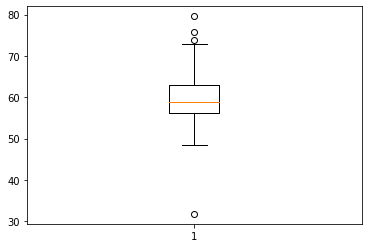

In [907]:
plt.boxplot(avg_femgrads_high['fem_grads'])
plt.show()

In [904]:
avg_femgrads_high.median()

fem_grads    58.794351
dtype: float64

In [874]:
# max and min and which country

print('min\n',avg_femgrads_high['fem_grads'].min(),'\n',
     avg_femgrads_high['Country'][avg_femgrads_high['fem_grads'].idxmin()],'\n\n')
print('max\n',avg_femgrads_high['fem_grads'].max(),'\n' ,
     avg_femgrads_high['Country'][avg_femgrads_high['fem_grads'].idxmax()])

min
 31.79169 
 Liechtenstein 


max
 79.60199 
 Curaçao


In [882]:
# let's have a look at the values sorted from max to min

avg_femgrads_high = avg_femgrads_high.sort_values('fem_grads',ascending = False)
avg_femgrads_high = avg_femgrads_high.reset_index(drop=True)
avg_femgrads_high

# it seems that Lienchestein is an outlier (low)
# and Curaçao, Seychelles, Aruba and British Virgin Islands (high)
# and might affect our mean



,Country,fem_grads
0,Curaçao,79.601990
1,Seychelles,75.690977
2,Aruba,73.746913
3,British Virgin Islands,72.808830
4,Poland,65.817544
5,Latvia,65.742554
6,Panama,65.571298
7,Estonia,64.977796
8,Andorra,63.648602
9,Puerto Rico,63.312838


In [889]:
# so let's eliminate Liechtenstein (sorry Liechtenstein!)
avg_femgrads_high_corrected = avg_femgrads_high.drop([53,0,1,2,3])

In [922]:
avg_femgrads_high_corrected.describe()

,fem_grads
count,49.000000
mean,58.453339
std,4.365882
min,48.482836
25%,56.036700
50%,58.585816
75%,62.026265
max,65.817544


In [892]:
# let's obtain a mean value for the high income countries

mean_femgrads_high = round(avg_femgrads_high['fem_grads'].mean(),2)
mean_femgrads_high

59.22

In [893]:
# let's obtain a mean value for the high income countries with the corrected list

mean_femgrads_high_corrected = round(avg_femgrads_high_corrected['fem_grads'].mean(),2)
mean_femgrads_high_corrected

58.45

#### HI: CONCLUSIONS 

It seems that the high income countries have an average of 59.22% of females graduating
<br><br>
50% of the data is comprised between ```56.13``` and ```62.88``` (very similar to the corrected values of 56% and 62%) with a median of ```58.7``` which is very similar to the percentage obtained when mean is calculated without the outliers.

#### NOT High Income

In [868]:
#dataset of the  countries that are NOT high income for the female graduates

femgrad_NOTadv_info = fem_grads[fem_grads['Country'].isin(NOTadv_countries_femgrad)]

In [869]:
# mean of fem_grads (not high inc) over the years (2013-2017) or the available years

avg_femgrads_Nhigh = femgrad_NOTadv_info.groupby('Country')['fem_grads'].mean()
avg_femgrads_Nhigh = avg_femgrads_Nhigh.reset_index()
avg_femgrads_Nhigh

,Country,fem_grads
0,Afghanistan,20.926905
1,Albania,64.234290
2,Algeria,63.346274
3,Angola,48.405573
4,Armenia,58.486623
...,...,...
84,Turkey,49.239600
85,Ukraine,53.905060
86,Uzbekistan,36.687765
87,Viet Nam,50.286188


In [870]:
# max, min, mean, std

avg_femgrads_Nhigh.describe()

,fem_grads
count,88.000000
mean,52.201126
std,10.956919
min,20.926905
25%,45.749591
50%,55.615516
75%,60.428155
max,81.347515


In [871]:
print('min\n',avg_femgrads_Nhigh['fem_grads'].min(),'\n',
     avg_femgrads_Nhigh['Country'][avg_femgrads_Nhigh['fem_grads'].idxmin()],'\n\n')
print('max\n',avg_femgrads_Nhigh['fem_grads'].max(),'\n' ,
     avg_femgrads_Nhigh['Country'][avg_femgrads_Nhigh['fem_grads'].idxmax()])

# it seems there is a lot of difference between values since the min is 20.9 and the max 81.3

min
 20.926904999999998 
 Afghanistan 


max
 81.347515 
 Sint Maarten (Dutch part)


In [913]:
# let's have a look at the values sorted from max to min

avg_femgrads_Nhigh.sort_values('fem_grads',ascending = False, inplace = True)
avg_femgrads_Nhigh.reset_index(drop = True, inplace = True)
avg_femgrads_Nhigh

,Country,fem_grads
0,Sint Maarten (Dutch part),81.347515
1,Namibia,66.308222
2,Myanmar,65.974020
3,Saint Lucia,65.960010
4,Tunisia,65.156268
...,...,...
83,Guinea,33.008700
84,Eritrea,31.644300
85,Bangladesh,31.628177
86,Burundi,28.255510


In [910]:
# we need to eliminate the NaN values

avg_femgrads_Nhigh.dropna(inplace=True)

In [914]:
# info about the values

avg_femgrads_Nhigh.describe()

,fem_grads
count,88.000000
mean,52.201126
std,10.956919
min,20.926905
25%,45.749591
50%,55.615516
75%,60.428155
max,81.347515


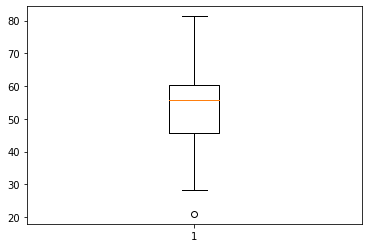

In [911]:
plt.boxplot(avg_femgrads_Nhigh['fem_grads'])
plt.show()

In [915]:
# There seems to be 2 outliers Sint Maarten (Dutch part) (high) and Afghanistan
# let's see what happens with the mean when we correct for them

avg_femgrads_Nhigh_corrected = avg_femgrads_Nhigh.drop([0,87])

In [919]:
avg_femgrads_Nhigh.mean()

fem_grads    52.201126
dtype: float64

In [918]:
avg_femgrads_Nhigh_corrected.mean()

fem_grads    52.225868
dtype: float64

In [921]:
avg_femgrads_Nhigh_corrected.describe()

,fem_grads
count,86.000000
mean,52.225868
std,10.068625
min,28.255510
25%,45.962744
50%,55.615516
75%,60.227517
max,66.308222


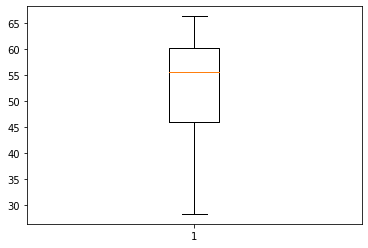

In [920]:
plt.boxplot(avg_femgrads_Nhigh_corrected['fem_grads'])
plt.show()

#### NHI: CONCLUSIONS
The mean for the % of females graduating in not high income countries is ```52.2%```
<br>
There are a couple of outliers but when eliminated the mean stays almost the same at 52.2% (the outliers counteract each other). However, the boxplot visually changes.
<br>
```50% of the data is comprised between 45.46% and 60.23%```, nonetheless, it is important to mention that compared to the high income countries, for the not high income, 25% of the data is below 45.96 (in between 28.25% and 45.96% for the corrected dataset) while the minimum value from the high income corrected dataset is 48%

#### Advance economies web scrapping

**Developed/Developing/Least developed**
<br>

[link to list of countries catalogued](https://www.imf.org/external/pubs/ft/weo/2009/01/weodata/groups.htm)

<br>
Germany, UK and EUA, the top 3 countries with nobel prizes (see the nobel prize section) are considered not only advanced economies but also ```major advanced economie```

In [754]:
#ADVANCED ECONOMIES

advanced_countries = [
'Australia',
'Austria',
'Andorra',
'Belgium',
'Canada',
'Cyprus',
'Czech Republic',
'Denmark',
'Finland',
'France',
'Germany',
'Greece',
'Hong Kong',
'Iceland',
'Ireland',
'Israel',
'Italy',
'Japan',
'Korea',
'Luxembourg',
'Malta',
'Netherlands',
'New Zealand',
'Norway',
'Portugal',
'Singapore',
'Slovak Republic',
'Slovenia',
'Spain',
'Sweden',
'Switzerland',
'Taiwan Province of China',
'United Kingdom of Great Britain and Northern Ireland',
'United States of America',
]


**---> UPDATE!!!!!**
<br>
Data from the info above is from the 2009, I decided to take a more complete list available in wikipedia from the World Bank
<br>
[link here](https://en.wikipedia.org/wiki/World_Bank_high-income_economy)

In [790]:
#Import libraries:

import requests 

from bs4 import BeautifulSoup 

#Download the webpage:

url = "https://en.wikipedia.org/wiki/World_Bank_high-income_economy" 

page = requests.get(url)

#Parse the html:

highcon = BeautifulSoup(page.content, 'html.parser') 

#print the formatted html 

print(highcon.prettify())

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   World Bank high-income economy - Wikipedia
  </title>
  <script>
   document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"5ae105e6-2e55-4631-9f07-bc6340e490c7","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"World_Bank_high-income_economy","wgTitle":"World Bank high-income economy","wgCurRevisionId":969970497,"wgRevisionId":969970497,"wgArticleId":12170583,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Pages using flagicon template with unknown parameters","Economic country classifications","Politics

In [854]:
# list of high income countries in the UN

list_countries_high = highcon.find_all('a')[34:121]
high_countries = []
for item in list_countries_high:
    high_countries.append(item.get_text())

In [855]:
high_countries

['Andorra',
 'Antigua and Barbuda',
 'Australia',
 'Austria',
 'The Bahamas',
 'Bahrain',
 'Barbados',
 'Belgium',
 'Brunei',
 'Canada',
 'Chile',
 'Croatia',
 'Cyprus',
 'Czech Republic',
 'Denmark',
 'Estonia',
 'Finland',
 'France',
 'Germany',
 'Greece',
 'Hungary',
 'Iceland',
 'Ireland',
 'Israel',
 'Italy',
 'Japan',
 'South Korea',
 'Kuwait',
 'Latvia',
 'Liechtenstein',
 'Lithuania',
 'Luxembourg',
 'Malta',
 'Mauritius',
 'Monaco',
 'Nauru',
 'Netherlands',
 'New Zealand',
 'Norway',
 'Oman',
 'Palau',
 'Panama',
 'Poland',
 'Portugal',
 'Romania',
 'Qatar',
 'Saint Kitts and Nevis',
 'San Marino',
 'Saudi Arabia',
 'Seychelles',
 'Singapore',
 'Slovakia',
 'Slovenia',
 'Spain',
 'Sweden',
 'Switzerland',
 'Trinidad and Tobago',
 'United Arab Emirates',
 'United Kingdom',
 'United States',
 'Uruguay',
 'edit',
 'Aruba',
 'Bermuda',
 'British Virgin Islands',
 'Cayman Islands',
 '',
 '',
 'Channel Islands',
 'Cook Islands',
 'Curaçao',
 'Faroe Islands',
 'French Polynesia',
 '

In [856]:
# let's remove what we do not need

high_countries.remove('edit')
high_countries.remove('')
high_countries.remove('')

In [858]:
# according to the World Bank

high_countries = ['Andorra',
 'Antigua and Barbuda',
 'Australia',
 'Austria',
 'Bahamas',
 'Bahrain',
 'Barbados',
 'Belgium',
 'Brunei',
 'Canada',
 'Chile',
 'Croatia',
 'Cyprus',
 'Czech Republic',
 'Denmark',
 'Estonia',
 'Finland',
 'France',
 'Germany',
 'Greece',
 'Hungary',
 'Iceland',
 'Ireland',
 'Israel',
 'Italy',
 'Japan',
 'South Korea',
 'Kuwait',
 'Latvia',
 'Liechtenstein',
 'Lithuania',
 'Luxembourg',
 'Malta',
 'Mauritius',
 'Monaco',
 'Nauru',
 'Netherlands',
 'New Zealand',
 'Norway',
 'Oman',
 'Palau',
 'Panama',
 'Poland',
 'Portugal',
 'Romania',
 'Qatar',
 'Saint Kitts and Nevis',
 'San Marino',
 'Saudi Arabia',
 'Seychelles',
 'Singapore',
 'Slovakia',
 'Slovenia',
 'Spain',
 'Sweden',
 'Switzerland',
 'Trinidad and Tobago',
 'United Arab Emirates',
 'United Kingdom of Great Britain and Northern Ireland',
 'United States of America',
 'Uruguay',
 'Aruba',
 'Bermuda',
 'British Virgin Islands',
 'Cayman Islands',
 'Channel Islands',
 'Cook Islands',
 'Curaçao',
 'Faroe Islands',
 'French Polynesia',
 'Gibraltar',
 'Greenland',
 'Guam',
 'Hong Kong',
 'Isle of Man',
 'Macao',
 'New Caledonia',
 'Northern Mariana Islands',
 'Puerto Rico',
 'Saint Martin',
 'Sint Maarten',
 'Taiwan',
 'Turks and Caicos Islands',
 'U.S. Virgin Islands']

### Graduates in STEM

In [597]:
# female graduates in STEM (%)

fem_STEM_grads = tertiary[tertiary['Indicator']=='Percentage of female graduates from Science, Technology, Engineering and Mathematics programmes in tertiary education, female (%)']

In [981]:
fem_STEM_grads.head(2)

,Code,Country,Year,Value
0,ABW,Aruba,2015,NaN
1,ABW,Aruba,2016,1.28205


In [1000]:
fem_STEM_grads['Year'].value_counts()
#2013-2019

2016    92
2015    89
2017    82
2014    49
2018    43
2013    36
2019     2
Name: Year, dtype: int64

In [973]:
#indicator and year is the same so we can eliminate it

fem_STEM_grads = fem_STEM_grads [['Code', 'Country','Year','Value']]

In [974]:
# reset index

fem_STEM_grads.reset_index(drop=True, inplace=True)

In [977]:
fem_STEM_grads['Country'].values

# Again, no world value we will have to use the list high_countries

array(['Aruba', 'Aruba', 'Panama', 'Panama', 'Panama', 'Ukraine',
       'Ukraine', 'Ukraine', 'Ukraine', 'Belarus', 'Belarus', 'Belarus',
       'Republic of Korea', 'Republic of Korea', 'Republic of Korea',
       'Poland', 'Poland', 'Poland', 'Poland', 'Poland',
       "Lao People's Democratic Republic",
       "Lao People's Democratic Republic",
       "Lao People's Democratic Republic",
       "Lao People's Democratic Republic", 'Netherlands', 'Netherlands',
       'Netherlands', 'Eswatini', 'Burkina Faso', 'Burkina Faso',
       'Burkina Faso', 'Burkina Faso', 'Burkina Faso', 'Madagascar',
       'Madagascar', 'Madagascar', 'Madagascar', 'Madagascar',
       'Bosnia and Herzegovina', 'Bosnia and Herzegovina',
       'Bosnia and Herzegovina', 'Bosnia and Herzegovina', 'Bermuda',
       'Bermuda', 'Bermuda', 'Eritrea', 'Denmark', 'Denmark', 'Denmark',
       'Denmark', 'Denmark', 'India', 'India', 'India', 'India', 'India',
       'India', 'Niue', 'Germany', 'Germany', 'Germany', '

In [985]:
# let's drop the NaN

#fem_STEM_grads.dropna(inplace = True)

#### World values

In [988]:
percentage_femgrads_STEM = round(fem_STEM_grads['Value'].mean(),2)
percentage_femgrads_STEM

13.39

#### Wvalue: CONCLUSIONS

Only ```13.39%``` of STEM graduates are females!!

#### High Income countries values

In [994]:
STEM_countries = fem_STEM_grads['Country'].value_counts().index.tolist()

In [997]:
high_STEM_countries = []
Nhigh_STEM_countries = []
for country in STEM_countries:
    if country in high_countries:
        high_STEM_countries.append(country)
    else:
        Nhigh_STEM_countries.append(country)

In [999]:
high_STEM_countries
# it include Nauru, Palau, Panama that were included as high-income 2015, 2016 and 2017
# in this case we are concerned about Panama (2017)
# considering that we take the average of 2013 throughout 2019, it is not going to be removed

['Denmark',
 'Lithuania',
 'Switzerland',
 'Belgium',
 'Estonia',
 'Norway',
 'Finland',
 'Portugal',
 'Spain',
 'Chile',
 'New Zealand',
 'Poland',
 'Malta',
 'Hungary',
 'Cyprus',
 'Latvia',
 'Seychelles',
 'Ireland',
 'Slovenia',
 'Bahrain',
 'Australia',
 'Luxembourg',
 'United Kingdom of Great Britain and Northern Ireland',
 'Canada',
 'Oman',
 'Croatia',
 'Romania',
 'Slovakia',
 'United States of America',
 'Saudi Arabia',
 'Italy',
 'France',
 'Sweden',
 'Greece',
 'Austria',
 'Bermuda',
 'Qatar',
 'United Arab Emirates',
 'Puerto Rico',
 'Germany',
 'Panama',
 'Netherlands',
 'Andorra',
 'Singapore',
 'Uruguay',
 'San Marino',
 'Mauritius',
 'Aruba']

In [1005]:
high_STEM_info = fem_STEM_grads[fem_STEM_grads['Country'].isin(high_STEM_countries)]
high_STEM_info.head(2)

,Code,Country,Year,Value
1,ABW,Aruba,2016,1.28205
2,PAN,Panama,2014,11.53176


In [1013]:
high_STEM_cmean = high_STEM_info.groupby('Country')['Value'].mean().reset_index()
high_STEM_cmean.head()

,Country,Value
0,Andorra,3.253115
1,Aruba,1.282050
2,Australia,9.585503
3,Austria,13.817217
4,Bahrain,11.764833


In [1014]:
high_STEM_cmean.describe()

,Value
count,48.000000
mean,13.097617
std,5.802518
min,1.282050
25%,10.305693
50%,12.047917
75%,15.432736
max,40.048970


In [1015]:
high_STEM_cmean.mean()

Value    13.097617
dtype: float64

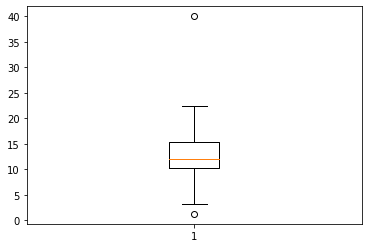

In [1018]:
plt.boxplot(high_STEM_cmean['Value'])
plt.show()

In [1024]:
# who is the outlier? let's see the sorted list
high_STEM_cmean_sorted = high_STEM_cmean.sort_values('Value',ascending = False)
high_STEM_cmean_sorted.reset_index(drop=True,inplace=True)
high_STEM_cmean_sorted

,Country,Value
0,Oman,40.048970
1,Singapore,22.422890
2,Greece,19.748767
3,Romania,19.675812
4,Germany,19.373503
5,Portugal,18.924104
6,United Arab Emirates,18.691813
7,United Kingdom of Great Britain and Northern I...,17.087418
8,Saudi Arabia,16.844912
9,Estonia,16.623442


In [1165]:
high_STEM_cmean_corrected = high_STEM_cmean_sorted.drop([0])

In [1166]:
high_STEM_cmean_corrected

,Country,Value
1,Singapore,22.422890
2,Greece,19.748767
3,Romania,19.675812
4,Germany,19.373503
5,Portugal,18.924104
6,United Arab Emirates,18.691813
7,United Kingdom of Great Britain and Northern I...,17.087418
8,Saudi Arabia,16.844912
9,Estonia,16.623442
10,Italy,16.098107


In [1167]:
high_STEM_cmean_corrected.mean()

# slight variation of the mean when the outliers are removed

Value    12.524184
dtype: float64

In [1168]:
high_STEM_cmean_corrected.describe()

,Value
count,47.000000
mean,12.524184
std,4.274858
min,1.282050
25%,10.211929
50%,12.030456
75%,15.107592
max,22.422890


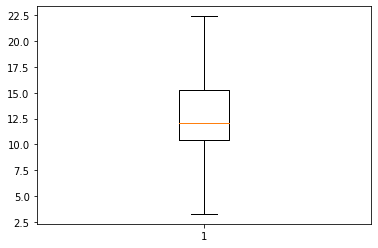

In [1033]:
plt.boxplot(high_STEM_cmean_corrected['Value'])
plt.show()

#### HI STEM: CONCLUSIONS

The high income countries have a % of females graduating from STEM that is comprised between  **12.76% - 22.42%** when the sample is corrected for outliers. Otherwise the max and the min are: **1.28% - 40%**

The mean of the sample is around ```13.09%``` and for the corrected sample around ```12.52%```

#### NOT high Income countries values


In [1035]:
#dataframe with the info of the not high income countries

Nhigh_STEM_info = fem_STEM_grads[fem_STEM_grads['Country'].isin(Nhigh_STEM_countries)]
Nhigh_STEM_info.head(2)

,Code,Country,Year,Value
5,UKR,Ukraine,2015,14.73417
6,UKR,Ukraine,2016,14.57455


In [1036]:
# mean per country of all years available

Nhigh_STEM_cmean = Nhigh_STEM_info.groupby('Country')['Value'].mean().reset_index()
Nhigh_STEM_cmean.head()

,Country,Value
0,Albania,14.571020
1,Algeria,28.140813
2,Angola,9.866080
3,Armenia,8.804927
4,Azerbaijan,15.203150


In [1037]:
Nhigh_STEM_cmean.describe()

,Value
count,74.000000
mean,14.071856
std,7.212188
min,0.784110
25%,8.597762
50%,13.072031
75%,16.360264
max,36.943660


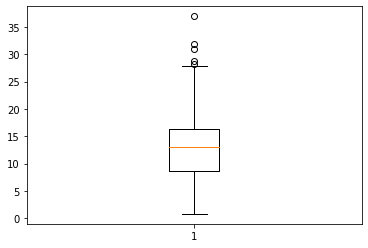

In [1040]:
plt.boxplot(Nhigh_STEM_cmean['Value'])
plt.show()

In [1042]:
# Are there outliers? let's see the sorted list

Nhigh_STEM_cmean_sorted = Nhigh_STEM_cmean.sort_values('Value',ascending = False)
Nhigh_STEM_cmean_sorted.reset_index(drop=True,inplace=True)
Nhigh_STEM_cmean_sorted.head(50)

#it doesn't seem so...

,Country,Value
0,Tunisia,36.943660
1,Iran (Islamic Republic of),31.795360
2,Myanmar,31.009170
3,Brunei Darussalam,28.687100
4,Algeria,28.140813
5,Sudan,27.830310
6,India,26.361642
7,Malaysia,26.198040
8,Mauritania,23.106690
9,Democratic People's Republic of Korea,22.155500


#### NHI: CONCLUSIONS
The mean female in STEM % is higher that the one for the high income countries: ```14.07%```. When we look at the data we can see that it is comprised between **0.78% and 36.94%** but also that 50% of the data is within the range of 8.59% and 16.36%, not that different from the high income countries(~10-15%) indicating that there are many countries with a high female in STEM percentage but also many coutries with it low.

# EU

## Tertiary education EU (females/100 males)

In [162]:
tertiary_EU = pd.read_csv('data/tertiary_education_women.csv')

In [1053]:
tertiary_EU.head(25) # there are values with no number and ':' instead, need to be eliminated

,Year,Country,Value
0,2003,Belgium,114.4
1,2004,Belgium,116.5
2,2005,Belgium,119.4
3,2006,Belgium,120.8
4,2007,Belgium,122.0
5,2008,Belgium,122.4
6,2009,Belgium,121.3
7,2010,Belgium,123.2
8,2011,Belgium,123.5
9,2012,Belgium,124.7


In [1047]:
tertiary_EU['Value'].dtype

dtype('O')

In [164]:
tertiary_EU.columns = ['Year', 'Country', 'INDIC_ED', 'Value']

In [165]:
tertiary_EU = tertiary_EU[['Year', 'Country','Value']]

In [173]:
# info is only up to 2012... pretty old...

tertiary_EU[tertiary_EU['Year']==2012]

# but we can see that in general more women go to university than men

,Year,Country,Value
9,2012,Belgium,124.7
19,2012,French Community in Belgium including small Ge...,:
29,2012,Flemish Community in Belgium,:
39,2012,Bulgaria,120.4
49,2012,Czechia,133.9
59,2012,Denmark,134.8
69,2012,Germany (until 1990 former territory of the FRG),100.3
79,2012,Estonia,144.9
89,2012,Ireland,103.5
99,2012,Greece,96.6


In [1044]:
tertiary_EU.groupby('Country')['Value'].mean()

DataError: No numeric types to aggregate

## People in STEM  (EU)

In [175]:
STEM_EU = pd.read_csv('data/women_men_scientists_EU_2.csv')

In [254]:
STEM_EU.head()

,SEX,GEO,TIME,CATEGORY,NACE_R2,AGE,UNIT,Value,Flag and Footnotes
0,Total,European Union - 28 countries (2013-2020),2016,Scientists and engineers,Total - all NACE activities,From 15 to 74 years,Thousand,"17,212.0",NaN
1,Total,European Union - 28 countries (2013-2020),2016,Scientists and engineers,High-technology sectors (high-technology manuf...,From 15 to 74 years,Thousand,"2,939.6",NaN
2,Total,European Union - 28 countries (2013-2020),2016,Scientists and engineers,Manufacturing,From 15 to 74 years,Thousand,"2,284.3",NaN
3,Total,European Union - 28 countries (2013-2020),2016,Scientists and engineers,High and medium high-technology manufacturing,From 15 to 74 years,Thousand,"1,463.4",NaN
4,Total,European Union - 28 countries (2013-2020),2016,Scientists and engineers,Services,From 15 to 74 years,Thousand,"13,729.7",NaN


## Female researchers EU

In [177]:
female_research_EU = pd.read_csv('data/female_researchers_EU.csv')

In [968]:
female_research_EU

,TIME,GEO,SECTPERF,UNIT,Value
0,2009,European Union - 27 countries (from 2020),All sectors,Percentage based on head count (HC),31.8
1,2010,European Union - 27 countries (from 2020),All sectors,Percentage based on head count (HC),:
2,2011,European Union - 27 countries (from 2020),All sectors,Percentage based on head count (HC),32.1
3,2012,European Union - 27 countries (from 2020),All sectors,Percentage based on head count (HC),:
4,2013,European Union - 27 countries (from 2020),All sectors,Percentage based on head count (HC),32.2
...,...,...,...,...,...
415,2014,South Korea,All sectors,Percentage based on head count (HC),18.5
416,2015,South Korea,All sectors,Percentage based on head count (HC),18.9
417,2016,South Korea,All sectors,Percentage based on head count (HC),19.7
418,2017,South Korea,All sectors,Percentage based on head count (HC),20.1


## STEM employment EU

In [937]:
# importing both male and female files

female_STEM_job_EU = pd.read_csv('data/females_employed_in_ST_EU2.csv',sep=';')
male_STEM_job_EU = pd.read_csv('data/males_employed_in_ST_EU2.csv',sep=';')

### Female STEM EU (15-74yrs) (value in thousands)
**People with tertiary education (ISCED) and/or employed in science and technology**

In [224]:
female_STEM_job_EU.head()

,TIME,GEO,SEX,CATEGORY,NACE_R2,AGE,UNIT,Value
0,2010,European Union - 27 countries (from 2020),Females,Persons with tertiary education (ISCED) and/or...,Total - all NACE activities,From 15 to 74 years,Thousand,38068.0
1,2011,European Union - 27 countries (from 2020),Females,Persons with tertiary education (ISCED) and/or...,Total - all NACE activities,From 15 to 74 years,Thousand,38304.2
2,2012,European Union - 27 countries (from 2020),Females,Persons with tertiary education (ISCED) and/or...,Total - all NACE activities,From 15 to 74 years,Thousand,39357.5
3,2013,European Union - 27 countries (from 2020),Females,Persons with tertiary education (ISCED) and/or...,Total - all NACE activities,From 15 to 74 years,Thousand,40051.1
4,2014,European Union - 27 countries (from 2020),Females,Persons with tertiary education (ISCED) and/or...,Total - all NACE activities,From 15 to 74 years,Thousand,41372.5


In [938]:
female_STEM_job_EU["CATEGORY"].value_counts()
# age can be eliminated (ALL THE SAME)
# also category
# also NACE_R2
# SEX can stay to join it with male

Persons with tertiary education (ISCED) and/or employed in science and technology    390
Name: CATEGORY, dtype: int64

In [939]:
female_STEM_job_EU.columns

Index(['TIME', 'GEO', 'SEX', 'CATEGORY', 'NACE_R2', 'AGE', 'UNIT', 'Value'], dtype='object')

In [940]:
# let's eliminate some columns

female_STEM_job_EU = female_STEM_job_EU[['TIME', 'GEO', 'SEX','Value']]

In [941]:
# and rename a few
female_STEM_job_EU.columns = ['Year', 'Country', 'Sex', 'Value']

In [942]:
females_STEM_EU28_evolution = female_STEM_job_EU[female_STEM_job_EU['Country']=='European Union - 28 countries (2013-2020)']

In [943]:
females_STEM_EU28_evolution

,Year,Country,Sex,Value
10,2010,European Union - 28 countries (2013-2020),Females,44405.8
11,2011,European Union - 28 countries (2013-2020),Females,45525.6
12,2012,European Union - 28 countries (2013-2020),Females,46753.2
13,2013,European Union - 28 countries (2013-2020),Females,47773.2
14,2014,European Union - 28 countries (2013-2020),Females,49328.6
15,2015,European Union - 28 countries (2013-2020),Females,50774.8
16,2016,European Union - 28 countries (2013-2020),Females,52258.6
17,2017,European Union - 28 countries (2013-2020),Females,53647.4
18,2018,European Union - 28 countries (2013-2020),Females,55166.9
19,2019,European Union - 28 countries (2013-2020),Females,56793.5


#### Graph females 2010-2019 (28 EU countries counting the UK)

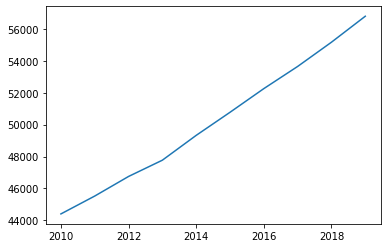

In [946]:
plt.plot(females_STEM_EU28_evolution['Year'],females_STEM_EU28_evolution['Value'])

### Male STEM

In [947]:
# let's eliminate some columns

male_STEM_job_EU = male_STEM_job_EU[['TIME', 'GEO', 'SEX','Value']]

In [948]:
# and rename a few
male_STEM_job_EU.columns = ['Year', 'Country', 'Sex', 'Value']

In [949]:
male_STEM_job_EU.head()

,Year,Country,Sex,Value
0,2010,European Union - 27 countries (from 2020),Males,37565.7
1,2011,European Union - 27 countries (from 2020),Males,38841.7
2,2012,European Union - 27 countries (from 2020),Males,39592.6
3,2013,European Union - 27 countries (from 2020),Males,40082.6
4,2014,European Union - 27 countries (from 2020),Males,40940.9


In [950]:
males_STEM_EU28_evolution = male_STEM_job_EU[male_STEM_job_EU['Country']=='European Union - 28 countries (2013-2020)']

#### Graph males 2010-2019 (28 EU countries counting the UK)

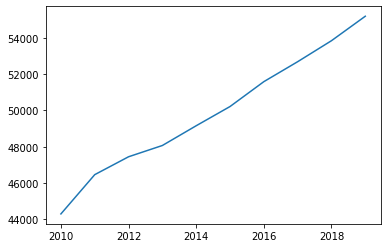

In [951]:
plt.plot(males_STEM_EU28_evolution['Year'],males_STEM_EU28_evolution['Value'])
plt.show()

### % Female STEM

In [952]:
STEM_merged_EU = pd.merge(males_STEM_EU28_evolution,females_STEM_EU28_evolution,how='outer')

In [954]:
STEM_merged_EU.head(2)

,Year,Country,Sex,Value
0,2010,European Union - 28 countries (2013-2020),Males,44305.1
1,2011,European Union - 28 countries (2013-2020),Males,46465.9


In [962]:
females_STEM,males_STEM = STEM_merged_EU.groupby('Sex')['Value'].mean()

In [966]:
fem_percentage_STEM = round((females_STEM/(females_STEM+males_STEM))*100,2)
fem_percentage_STEM

50.17

#### Conclusions
We obtained that the females percentage eas 50.17% (pariety). Nonetheless, if we have a quick look at the description of the data it indicates that the numbers are for People with tertiary education (ISCED) ```and/or``` employed in science and technology, special emphasis on the **AND/OR** since the number might indicate that there are many women with tertiary education but not employed in STEM.

# Catalonia

## Top degree choices (2019 Catalonia)

In [31]:
degree_top_cat = pd.read_csv("data/degree_top_cat.csv",sep=';')

## University entry grade  ( june 2019 Catalonia)

In [35]:
notes_tall_sele = pd.read_csv("data/notes_tall_sele.csv",sep=';')

# Nobel price

In [256]:
nobel = pd.read_csv("data/nobel.csv")

In [1164]:
nobel.head(1)

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany


In [1163]:
# the dataframe needs an update for the 2017, 2018 and 2019 winners!!
# in those 3 years only 2 more females have won

nobel.columns
'''
{'year':2018, 'category':'Physics', 'prize':'The Nobel Prize in Physics 2018', 
       'motivation':'for their method of generating high-intensity, ultra-short optical pulses', 
       'prize_share':'1/3', 'laureate_id',
       'laureate_type':'individual', 'full_name':'Donna Strickland', 'birth_date':, 'birth_city',
       'birth_country':'Canada', 'sex':'Female', 'organization_name', 'organization_city',
       'organization_country', 'death_date', 'death_city', 'death_country'}

{'year':2018, 'category':'Chemistry', 'prize':'The Nobel Prize in Chemistry 2018', 'motivation', 'prize_share', 'laureate_id',
       'laureate_type':'individual', 'full_name':'Frances Arnold', 
       'birth_date', 'birth_city',
       'birth_country':'United States of America', 'sex', 'organization_name', 'organization_city',
       'organization_country', 'death_date', 'death_city', 'death_country'}
'''

Index(['year', 'category', 'prize', 'motivation', 'prize_share', 'laureate_id',
       'laureate_type', 'full_name', 'birth_date', 'birth_city',
       'birth_country', 'sex', 'organization_name', 'organization_city',
       'organization_country', 'death_date', 'death_city', 'death_country'],
      dtype='object')

In [260]:
nobel['birth_country'].value_counts().index

# top 10 countries
# United States of America', 'United Kingdom', 'Germany', 'France',
# 'Sweden', 'Japan', 'Canada', 'Netherlands', 'Italy', 'Russia'

Index(['United States of America', 'United Kingdom', 'Germany', 'France',
       'Sweden', 'Japan', 'Canada', 'Netherlands', 'Italy', 'Russia',
       ...
       'Austria-Hungary (Austria)', 'Russian Empire (Azerbaijan)',
       'Tibet (People's Republic of China)', 'Poland (Lithuania)', 'Nigeria',
       'Brazil', 'British Protectorate of Palestine (Israel)',
       'Ottoman Empire (Turkey)', 'Java, Dutch East Indies (Indonesia)',
       'Austrian Empire (Italy)'],
      dtype='object', length=121)

In [266]:
nobel.sort_values(by = 'birth_country')

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
513,1980,Peace,The Nobel Peace Prize 1980,NaN,1/1,541,Individual,Adolfo Pérez Esquivel,1931-11-26,Buenos Aires,Argentina,Male,NaN,NaN,NaN,NaN,NaN,NaN
548,1984,Medicine,The Nobel Prize in Physiology or Medicine 1984,"""for theories concerning the specificity in de...",1/3,431,Individual,César Milstein,1927-10-08,Bahia Blanca,Argentina,Male,MRC Laboratory of Molecular Biology,Cambridge,United Kingdom,2002-03-24,Cambridge,United Kingdom
236,1947,Medicine,The Nobel Prize in Physiology or Medicine 1947,"""for his discovery of the part played by the h...",1/2,345,Individual,Bernardo Alberto Houssay,1887-04-10,Buenos Aires,Argentina,Male,Instituto de Biologia y Medicina Experimental ...,Buenos Aires,Argentina,1971-09-21,Buenos Aires,Argentina
187,1936,Peace,The Nobel Peace Prize 1936,NaN,1/1,501,Individual,Carlos Saavedra Lamas,1878-11-01,Buenos Aires,Argentina,Male,NaN,NaN,NaN,1959-05-05,Buenos Aires,Argentina
668,1996,Medicine,The Nobel Prize in Physiology or Medicine 1996,"""for their discoveries concerning the specific...",1/2,455,Individual,Peter C. Doherty,1940-10-15,Brisbane,Australia,Male,St. Jude Children's Research Hospital,"Memphis, TN",United States of America,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
789,2006,Peace,The Nobel Peace Prize 2006,"""for their efforts to create economic and soci...",1/2,810,Organization,Grameen Bank,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
800,2007,Peace,The Nobel Peace Prize 2007,"""for their efforts to build up and disseminate...",1/2,818,Organization,Intergovernmental Panel on Climate Change (IPCC),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
860,2012,Peace,The Nobel Peace Prize 2012,"""for over six decades contributed to the advan...",1/1,881,Organization,European Union (EU),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
873,2013,Peace,The Nobel Peace Prize 2013,"""for its extensive efforts to eliminate chemic...",1/1,893,Organization,Organisation for the Prohibition of Chemical W...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1158]:
nobel['year'].unique()

array([1901, 1902, 1903, 1904, 1905, 1906, 1907, 1908, 1909, 1910, 1911,
       1912, 1913, 1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921, 1922,
       1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933,
       1934, 1935, 1936, 1937, 1938, 1939, 1943, 1944, 1945, 1946, 1947,
       1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958,
       1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969,
       1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980,
       1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991,
       1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002,
       2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013,
       2014, 2015, 2016])

In [323]:
# which nobels are awarded?

nobel['category'].value_counts()

Medicine      211
Physics       204
Chemistry     175
Peace         130
Literature    113
Economics      78
Name: category, dtype: int64

In [347]:
# we are only interested in the scientific ones: Medicine, Physics, Chemistry

science_nobel = nobel[(nobel['category']=='Medicine') | (nobel['category']=='Physics') | (nobel['category']=='Chemistry')]
science_nobel=science_nobel.reset_index(drop=True)

In [348]:
# let see which country got the most

by_country = science_nobel['birth_country'].value_counts()

In [349]:
# we are going to take those with more than 10 nobel prizes (there are 11 countries)

by_country [by_country>10]

United States of America    188
United Kingdom               67
Germany                      51
France                       28
Japan                        21
Sweden                       15
Netherlands                  15
Canada                       12
Switzerland                  12
Austria                      11
Italy                        11
Name: birth_country, dtype: int64

In [350]:
# top 3: there is a big difference after the 3rd (also from the first and the rest)

by_country[:3]

United States of America    188
United Kingdom               67
Germany                      51
Name: birth_country, dtype: int64

### FEMALES with nobels

In [362]:
# females with a science nobel price

science_nobel.groupby('sex')['full_name'].count()

#ONLY 18 FEMALES!!! compared to 572

sex
Female     18
Male      572
Name: full_name, dtype: int64

In [372]:
science_nobel.columns

Index(['year', 'category', 'prize', 'motivation', 'prize_share', 'laureate_id',
       'laureate_type', 'full_name', 'birth_date', 'birth_city',
       'birth_country', 'sex', 'organization_name', 'organization_city',
       'organization_country', 'death_date', 'death_city', 'death_country'],
      dtype='object')

In [403]:
#info about the females that obtained the nobel

female_info = science_nobel[(science_nobel['sex']=='Female')][['motivation','birth_country','year','full_name','category','organization_name']]

#sorted by years from more antique to less

female_info = female_info.sort_values('year')
female_info

,motivation,birth_country,year,full_name,category,organization_name
11,"""in recognition of the extraordinary services ...",Russian Empire (Poland),1903,"Marie Curie, née Sklodowska",Physics,NaN
36,"""in recognition of her services to the advance...",Russian Empire (Poland),1911,"Marie Curie, née Sklodowska",Chemistry,Sorbonne University
108,"""in recognition of their synthesis of new radi...",France,1935,Irène Joliot-Curie,Chemistry,Institut du Radium
148,"""for their discovery of the course of the cata...",Austria-Hungary (Czech Republic),1947,"Gerty Theresa Cori, née Radnitz",Medicine,Washington University
232,"""for their discoveries concerning nuclear shel...",Germany (Poland),1963,Maria Goeppert Mayer,Physics,University of California
234,"""for her determinations by X-ray techniques of...",Egypt,1964,Dorothy Crowfoot Hodgkin,Chemistry,"University of Oxford, Royal Society"
316,"""for the development of radioimmunoassays of p...",United States of America,1977,Rosalyn Yalow,Medicine,Veterans Administration Hospital
356,"""for her discovery of mobile genetic elements""",United States of America,1983,Barbara McClintock,Medicine,Cold Spring Harbor Laboratory
374,"""for their discoveries of growth factors""",Italy,1986,Rita Levi-Montalcini,Medicine,Institute of Cell Biology of the C.N.R.
388,"""for their discoveries of important principles...",United States of America,1988,Gertrude B. Elion,Medicine,Wellcome Research Laboratories


In [378]:
# why were these women given a nobel price?

motivation = female_info['motivation'].tolist()

motivation

['"in recognition of the extraordinary services they have rendered by their joint researches on the radiation phenomena discovered by Professor Henri Becquerel"',
 '"in recognition of her services to the advancement of chemistry by the discovery of the elements radium and polonium, by the isolation of radium and the study of the nature and compounds of this remarkable element"',
 '"in recognition of their synthesis of new radioactive elements"',
 '"for their discovery of the course of the catalytic conversion of glycogen"',
 '"for their discoveries concerning nuclear shell structure"',
 '"for her determinations by X-ray techniques of the structures of important biochemical substances"',
 '"for the development of radioimmunoassays of peptide hormones"',
 '"for her discovery of mobile genetic elements"',
 '"for their discoveries of growth factors"',
 '"for their discoveries of important principles for drug treatment"',
 '"for their discoveries concerning the genetic control of early embr

In [416]:
# by country
female_info.groupby('birth_country')['full_name'].count()

birth_country
Australia                                1
Austria-Hungary (Czech Republic)         1
British Mandate of Palestine (Israel)    1
China                                    1
Egypt                                    1
France                                   2
Germany                                  1
Germany (Poland)                         1
Italy                                    1
Norway                                   1
Russian Empire (Poland)                  2
United States of America                 5
Name: full_name, dtype: int64

In [423]:
# by category

female_info['category'].value_counts()

Medicine     12
Chemistry     4
Physics       2
Name: category, dtype: int64

In [430]:
# When were the nobels obtained?

century20 = female_info[female_info['year']<2000]
century21 = female_info[female_info['year']>=2000]

In [439]:
# 20th Century

century20[['year',"full_name",'birth_country','category']]  

len(century20)     # 11 nobels

century20.groupby('category')['full_name'].count()

category
Chemistry    3
Medicine     6
Physics      2
Name: full_name, dtype: int64

In [440]:
# 21th Century

century21[['year',"full_name",'birth_country','category']]

len(century21)     # 7 nobels

century21.groupby('category')['full_name'].count()


category
Chemistry    1
Medicine     6
Name: full_name, dtype: int64

### TOP 11 countries (>11 nobel prices)

In [353]:
# with more than 10 nobel prices (males and females)

top11 = science_nobel[
    (science_nobel['birth_country']=='United States of America')|
    (science_nobel['birth_country']=='United Kingdom')|
    (science_nobel['birth_country']=='Germany')|
    (science_nobel['birth_country']=='France')|
    (science_nobel['birth_country']=='Sweden')|
    (science_nobel['birth_country']=='Japan')|
    (science_nobel['birth_country']=='Canada')|
    (science_nobel['birth_country']=='Netherlands')|
    (science_nobel['birth_country']=='Italy')|
    (science_nobel['birth_country']=='Austria')|
    (science_nobel['birth_country']=='Switzerland')
]

top11 = top11.reset_index(drop=True)   

In [383]:
# females in the top11

len(top11[top11['sex']=='Female'])  # there are 9 females
len(top11[top11['sex']=='Male'])    # there are 422 males

422

In [413]:
# let see the females in the top11 in which categories
top11_females = top11[top11['sex']=='Female']

top11_females[['full_name','birth_country','category','year']]

#8/9 in medicine

,full_name,birth_country,category,year
69,Irène Joliot-Curie,France,Chemistry,1935
215,Rosalyn Yalow,United States of America,Medicine,1977
249,Barbara McClintock,United States of America,Medicine,1983
263,Rita Levi-Montalcini,Italy,Medicine,1986
272,Gertrude B. Elion,United States of America,Medicine,1988
308,Christiane Nüsslein-Volhard,Germany,Medicine,1995
362,Linda B. Buck,United States of America,Medicine,2004
385,Françoise Barré-Sinoussi,France,Medicine,2008
391,Carol W. Greider,United States of America,Medicine,2009


In [412]:
# by country the females
top11_females.groupby('birth_country')['full_name'].count()

birth_country
France                      2
Germany                     1
Italy                       1
United States of America    5
Name: full_name, dtype: int64

### TOP 3 countries

In [357]:
# top 3 (males and females)

top3 = science_nobel[
    (science_nobel['birth_country']=='United States of America')|
    (science_nobel['birth_country']=='United Kingdom')|
    (science_nobel['birth_country']=='Germany')
]

top3 = top3.reset_index(drop=True)   

In [399]:
# females in the top 3

len(top3[top3['sex']=='Female'])  # there are 6 females
len(top3[top3['sex']=='Male'])    # there are 300 males

300

In [421]:
# males in our top 3
top3_males = top3[(top3['sex']=='Male')]
top3_males.groupby('birth_country')['full_name'].count()


birth_country
Germany                      50
United Kingdom               67
United States of America    183
Name: full_name, dtype: int64

In [414]:
# let see the females in the top11 in which categories

top3_females = top3[top3['sex']=='Female']

top3_females[['full_name','birth_country','category','year']]

# 100% in medicine

,full_name,birth_country,category,year
149,Rosalyn Yalow,United States of America,Medicine,1977
173,Barbara McClintock,United States of America,Medicine,1983
189,Gertrude B. Elion,United States of America,Medicine,1988
218,Christiane Nüsslein-Volhard,Germany,Medicine,1995
260,Linda B. Buck,United States of America,Medicine,2004
281,Carol W. Greider,United States of America,Medicine,2009


In [415]:
# by country the females

top3_females.groupby('birth_country')['full_name'].count()

#UNITED KINGDOM HAS 0 FEMALE NOBEL PRICES!! WHAT? ARE YOU KIDDING ME?

birth_country
Germany                     1
United States of America    5
Name: full_name, dtype: int64

### CONCLUSIONS

In the scientific modalities (Chemistry, Physics and Medicine) there are only 18 females per 572 males from 1901 until 2016. <br><br>
The country with more nobel prices (both sexes) is the USA with: 
- 5 female nobel and 183 male nobel
<br><br>
**In the top 3 countries with more nobels the proportions male female are**:
- EUA---------> 5/183
- UK----------> 0/67
- Germany-----> 1/50

**From the 18 female nobel prices the categories in which they were awarded are**:
- Medicine----> 12
- Physics ----> 4
- Chemistry --> 2

**Female nobel over the years**:
- 20th Century:
    - 11 nobels:
        - Chemistry---->3
        - Medicine----->6
        - Physics------>2
- 21st Century:
    - 7 nobels:
        - Chemistry--->1
        - Medicine---->6

<br><br>

```Females are way underepresented in the nobel prices since its creation. It may have seemed that in the 21st Century, and with the progressive increase in university educated females, that the gap between males and females would close, but it hasn't, so.... where do the females go?```
<br><br>
- ```Could it be because there are less women in the world?```
- ```Could it be because less women study scientific degrees?```
- ```Could it be because less women work in research? or ```
- ```less women have scientific jobs?```
- ```What is happening in the top3 countries? with more nobels shouldn't there be more female nobels?```


In [1161]:
(572+18)/115

5.130434782608695